In [16]:
import filter
import IO
import sys
import numpy as np
#import offline_analysis
import time
import json
import os
import pandas as pd
import mne
import mne_bids

### read M1 tsv

In [2]:
PATH_M1 = "C:\\Users\\ICN_admin\\Charité - Universitätsmedizin Berlin\\Interventional Cognitive Neuromodulation - Data\\Datasets\\BIDS Berlin\\sub-002\\ses-20200131\\ieeg\\sub-002_ses-20200131_task-selfpacedrotation202001310001_run-4_channels_M1.tsv"

In [3]:
df_M1 = pd.read_csv(PATH_M1, sep="\t") 

In [4]:
df_M1

,name,rereference,used,target,ECOG
0,LFP_STN_R_234,average,1,0,0
1,LFP_STN_R_567,average,1,0,0
2,LFP_BS_STN_L_1,average,1,0,0
3,LFP_STN_L_234,average,1,0,0
4,LFP_STN_L_567,average,1,0,0
5,ECOG_AT_SM_L_1,average,1,0,1
6,ECOG_AT_SM_L_2,average,1,0,1
7,ECOG_AT_SM_L_3,average,1,0,1
8,ECOG_AT_SM_L_4,average,1,0,1
9,ECOG_AT_SM_L_5,average,1,0,1


### read settings 

In [5]:
with open('settings\\settings.json', 'rb') as f:
    settings = json.load(f)

In [6]:
settings

{'BIDS_path': 'C:\\Users\\icn_admin\\OneDrive - Charité - Universitätsmedizin Berlin\\Data\\BIDS Berlin',
 'out_path': 'C:\\Users\\ICN_admin\\Documents\\icn\\icn_m1\\restructure\\BIDS_Berlin_M1',
 'resamplingrate': 10,
 'max_dist_cortex': 20,
 'max_dist_subcortex': 5,
 'normalization_time': 10,
 'frequencyranges': [[4, 8],
  [8, 12],
  [13, 20],
  [20, 35],
  [13, 35],
  [60, 80],
  [90, 200],
  [60, 200]],
 'featurelabels': ['theta',
  'alpha',
  'low beta',
  'high beta',
  'all beta',
  'low gamma',
  'HFA',
  'all gamma'],
 'seglengths': [1, 2, 2, 3, 3, 3, 10, 10, 10],
 'clip_low': -3,
 'clip_high': 3}

In [7]:
settings["BIDS_path"] = "C:\\Users\\ICN_admin\\Charité - Universitätsmedizin Berlin\\Interventional Cognitive Neuromodulation - Data\\Datasets\\BIDS Berlin"

### pipeline

In [8]:
ieeg_files = IO.get_all_ieeg_files(settings['BIDS_path'])

In [9]:
run_file_to_read = "C:\\Users\\ICN_admin\\Charité - Universitätsmedizin Berlin\\Interventional Cognitive Neuromodulation - Data\\Datasets\\BIDS Berlin\\sub-002\\ses-20200131\\ieeg\\sub-002_ses-20200131_task-selfpacedrotation202001310001_run-4_ieeg.vhdr"

In [10]:
subject, sess, task, run = IO.get_subject_sess_task_run(os.path.basename(run_file_to_read))

In [11]:
subject

'002'

In [12]:
sess

'20200131'

In [13]:
task

'selfpacedrotation202001310001'

In [14]:
run

'4'

### read now using mne.io read_bids

In [19]:
run_path = mne_bids.BIDSPath(subject=subject, session=sess, task=task, run=run,
                     suffix="ieeg", root=settings["BIDS_path"], datatype="ieeg")

In [21]:
run_raw_arr = mne_bids.read_raw_bids(run_path)

Extracting parameters from C:\Users\ICN_admin\Charité - Universitätsmedizin Berlin\Interventional Cognitive Neuromodulation - Data\Datasets\BIDS Berlin\sub-002\ses-20200131\ieeg\sub-002_ses-20200131_task-selfpacedrotation202001310001_run-4_ieeg.vhdr...
Setting channel info structure...
Reading events from C:\Users\ICN_admin\Charité - Universitätsmedizin Berlin\Interventional Cognitive Neuromodulation - Data\Datasets\BIDS Berlin\sub-002\ses-20200131\ieeg\sub-002_ses-20200131_task-selfpacedrotation202001310001_run-4_events.tsv.
Reading channel info from C:\Users\ICN_admin\Charité - Universitätsmedizin Berlin\Interventional Cognitive Neuromodulation - Data\Datasets\BIDS Berlin\sub-002\ses-20200131\ieeg\sub-002_ses-20200131_task-selfpacedrotation202001310001_run-4_channels.tsv.
Reading in coordinate system frame other: None.
Reading electrode coords from C:\Users\ICN_admin\Charité - Universitätsmedizin Berlin\Interventional Cognitive Neuromodulation - Data\Datasets\BIDS Berlin\sub-002\ses-

<ipython-input-21-055177aad200>:1: RuntimeWarning: There are channels without locations (n/a) that are not marked as bad: ['LFP_STN_R_234', 'LFP_STN_R_567', 'LFP_STN_L_234', 'LFP_STN_L_567', 'ANALOG_ROT_R_1']
  run_raw_arr = mne_bids.read_raw_bids(run_path)
<ipython-input-21-055177aad200>:1: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  run_raw_arr = mne_bids.read_raw_bids(run_path)


In [24]:
from matplotlib import pyplot as plt

In [27]:
run_raw_arr.info["dig"]

[<DigPoint |     EEG #1 : (nan, nan, nan) mm        : MNI Talairach frame>,
 <DigPoint |     EEG #2 : (nan, nan, nan) mm        : MNI Talairach frame>,
 <DigPoint |     EEG #3 : (11.8, -14.9, -9.1) mm    : MNI Talairach frame>,
 <DigPoint |     EEG #4 : (nan, nan, nan) mm        : MNI Talairach frame>,
 <DigPoint |     EEG #5 : (nan, nan, nan) mm        : MNI Talairach frame>,
 <DigPoint |     EEG #6 : (-40.0, -73.0, 40.0) mm   : MNI Talairach frame>,
 <DigPoint |     EEG #7 : (-41.0, -64.0, 46.5) mm   : MNI Talairach frame>,
 <DigPoint |     EEG #8 : (-41.0, -55.0, 52.5) mm   : MNI Talairach frame>,
 <DigPoint |     EEG #9 : (-40.0, -44.5, 55.5) mm   : MNI Talairach frame>,
 <DigPoint |    EEG #10 : (-40.0, -34.5, 59.5) mm   : MNI Talairach frame>,
 <DigPoint |    EEG #11 : (-40.0, -23.5, 59.5) mm   : MNI Talairach frame>]

In [33]:
run_raw_arr.get_montage()

<DigMontage | 0 extras (headshape), 0 HPIs, 0 fiducials, 11 channels>

In [ ]:
fig = plot_alignment(run_raw_arr.info, subject=subject, subjects_dir=subjects_dir,
                     surfaces=['pial'], trans=trans, coord_frame='mri')
mne.viz.set_3d_view(fig, 200, 70, focalpoint=[0, -0.005, 0.03])

xy, im = snapshot_brain_montage(fig, montage)

Effective window size : 1.489 (s)
Effective window size : 1.489 (s)


<ipython-input-35-d426269ebaaf>:1: UserWarning: Infinite value in PSD for channel LFP_STN_R_234.
These channels might be dead.
  run_raw_arr.plot_psd()


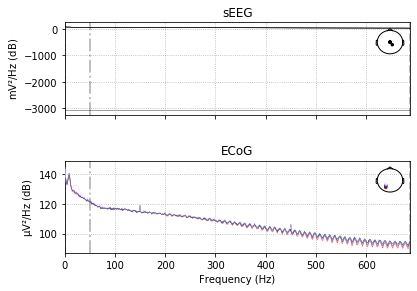

In [35]:
run_raw_arr.plot_psd()
plt.show()

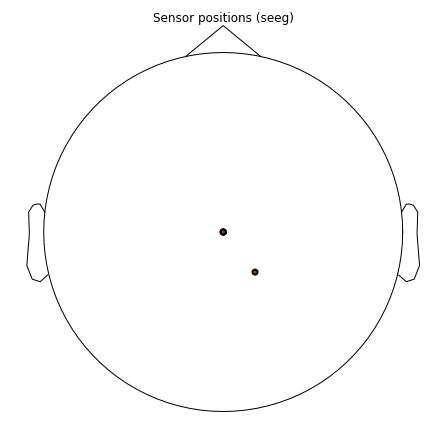

In [36]:
run_raw_arr.plot_sensors()
plt.show()

In [37]:
ieeg_raw, ch_names = IO.read_BIDS_file(run_file_to_read)

Extracting parameters from C:\Users\ICN_admin\Charité - Universitätsmedizin Berlin\Interventional Cognitive Neuromodulation - Data\Datasets\BIDS Berlin\sub-002\ses-20200131\ieeg\sub-002_ses-20200131_task-selfpacedrotation202001310001_run-4_ieeg.vhdr...
Setting channel info structure...


In [38]:
ieeg_raw.shape

(12, 613328)

In [39]:
ch_names

['LFP_STN_R_234',
 'LFP_STN_R_567',
 'LFP_BS_STN_L_1',
 'LFP_STN_L_234',
 'LFP_STN_L_567',
 'ECOG_AT_SM_L_1',
 'ECOG_AT_SM_L_2',
 'ECOG_AT_SM_L_3',
 'ECOG_AT_SM_L_4',
 'ECOG_AT_SM_L_5',
 'ECOG_AT_SM_L_6',
 'ANALOG_ROT_R_1']

### transfer this fileread to 

In [215]:
import mne_bids

In [216]:
run

'4'

In [217]:
subject

'002'

In [218]:
sess

'20200131'

In [269]:
run_path = mne_bids.BIDSPath(subject=subject, session=sess, task=task, run=run,
                     suffix="ieeg", root=settings["BIDS_path"], datatype="ieeg")

In [270]:
run_path

BIDSPath(
root: C:\Users\icn_admin\OneDrive - Charité - Universitätsmedizin Berlin\Data\BIDS Berlin
datatype: ieeg
basename: sub-002_ses-20200131_task-selfpacedrotation202001310001_run-4_ieeg)

In [271]:
run_raw_arr = mne_bids.read_raw_bids(run_path)

<ipython-input-271-055177aad200>:1: RuntimeWarning: Could not locate a data file of a supported format. This is likely a problem with your BIDS dataset. Please run the BIDS validator on your data. (root=C:\Users\icn_admin\OneDrive - Charité - Universitätsmedizin Berlin\Data\BIDS Berlin, basename=sub-002_ses-20200131_task-selfpacedrotation202001310001_run-4_ieeg). []
  run_raw_arr = mne_bids.read_raw_bids(run_path)


TypeError: expected str, bytes or os.PathLike object, not NoneType

In [183]:
run_raw_arr.info

<Info | 9 non-empty values
 bads: []
 ch_names: LFP_STN_R_234, LFP_STN_R_567, LFP_BS_STN_L_1, LFP_STN_L_234, ...
 chs: 12 ECOG
 custom_ref_applied: False
 highpass: 0.0 Hz
 line_freq: 50
 lowpass: 687.8 Hz
 meas_date: unspecified
 nchan: 12
 projs: []
 sfreq: 1375.5 Hz
 subject_info: 5 items (dict)
>

In [184]:
run_raw_arr.info["subject_info"]

{'participant_id': 'sub-002',
 'age': 'n/a',
 'sex': 0,
 'hand': 0,
 'line_noise': '50'}

In [185]:
run_raw_arr.get_data().shape

(12, 613328)

In [186]:
run_raw_arr.get_channel_types()

['ecog',
 'ecog',
 'ecog',
 'ecog',
 'ecog',
 'ecog',
 'ecog',
 'ecog',
 'ecog',
 'ecog',
 'ecog',
 'ecog']

In [187]:
run_raw_arr.get_montage()

### doesn't work, let's stay with custom fct

In [60]:
ieeg_raw, ch_names = IO.read_BIDS_file(run_file_to_read)

Extracting parameters from C:\Users\ICN_admin\Charité - Universitätsmedizin Berlin\Interventional Cognitive Neuromodulation - Data\Datasets\BIDS Berlin\sub-002\ses-20200131\ieeg\sub-002_ses-20200131_task-selfpacedrotation202001310001_run-4_ieeg.vhdr...
Setting channel info structure...


### read also the coordinates.tsv

In [64]:
os.path.dirname(run_file_to_read)

'C:\\Users\\ICN_admin\\Charité - Universitätsmedizin Berlin\\Interventional Cognitive Neuromodulation - Data\\Datasets\\BIDS Berlin\\sub-002\\ses-20200131\\ieeg'

In [68]:
df_coord = pd.read_csv(os.path.join(os.path.dirname(run_file_to_read), \
                                    "sub-"+subject+"_electrodes.tsv"), sep="\t")

In [69]:
df_coord

,name,x,y,z,size
0,ECOG_AT_SM_L_1,-40.0000,-73.0000,40.00000,4
1,ECOG_AT_SM_L_2,-41.0000,-64.0000,46.50000,4
2,ECOG_AT_SM_L_3,-41.0000,-55.0000,52.50000,4
3,ECOG_AT_SM_L_4,-40.0000,-44.5000,55.50000,4
4,ECOG_AT_SM_L_5,-40.0000,-34.5000,59.50000,4
5,ECOG_AT_SM_L_6,-40.0000,-23.5000,59.50000,4
6,LFP_BS_STN_L_1,11.8327,-14.8891,-9.10934,4
7,LFP_BS_STN_L_2,12.3707,-13.6485,-7.03789,4
8,LFP_BS_STN_L_3,12.0276,-14.6680,-6.40611,4
9,LFP_BS_STN_L_4,13.1289,-14.5918,-7.01071,4


### gosh, there are different number of electrode contacts than saved iEEG channels... might be difficult for standard plotting functions

### read fs, where we assume that fs is same for all channels

In [84]:
fs=IO.read_run_sampling_frequency(run_file_to_read)[0] 

In [85]:
fs

1375.5158184319118

In [86]:
fs = int(np.ceil(fs)) # cast it to int

In [87]:
fs 

1376

In [191]:
def ieeg_raw_generator(ieeg_raw, df_M1, settings, fs):
    """[summary]

    Args:
        ieeg_raw (np array): shape (channels, time)
        fs (float): 
        fs_new (float): new resampled frequency 
        offset_start (int): size of highest segmenth length, needs to be skipped at the start to have same feature size

    Yields:
        np.array: new batch for run function of full segment length shape
    """

    cnt_fsnew = 0
    offset_start = settings["seglengths"][0] * fs
    fs_new = settings["resamplingrate"]
    used_idx = df_M1[(df_M1["used"] == 1) & (df_M1["target"] == 0)].index
    
    for cnt in range(ieeg_raw.shape[1]):
        if cnt < offset_start:
            cnt_fsnew +=1
            continue
        
        cnt_fsnew +=1
        if cnt_fsnew >= (fs/fs_new):
            cnt_fsnew = 0
            yield ieeg_raw[used_idx,cnt-offset_start:cnt]

In [192]:
gen_ = ieeg_raw_generator(ieeg_raw, df_M1, settings, fs)

In [90]:
next(gen_, None).shape # None, since None should be returned when run is finished

(11, 1376)

In [173]:
next(gen_, None)

array([[   0.,    0.,    0., ...,    0.,    0.,    0.],
       [ -55.,  -59.,  -59., ..., -110., -109., -110.],
       [  33.,   28.,   31., ...,   43.,   45.,   45.],
       ...,
       [   9.,    4.,    8., ...,    1.,    2.,    0.],
       [  11.,    5.,    6., ...,    7.,   11.,    9.],
       [  30.,   20.,   20., ...,   58.,   60.,   59.]])

### read line noise

In [91]:
line_noise = IO.read_line_noise(settings['BIDS_path'],"002") # line noise is a column in the participants.tsv

In [92]:
line_noise

50

### calculate filter

In [109]:
fs

1376

#### well here I needed t add to the filter_len 1, need to recheck if that's every time neccessary!

In [113]:
filter_fun = filter.calc_band_filters(settings['frequencyranges'], sample_rate=fs, filter_len=fs+1)

No data specified. Sanity checks related to the length of the signal relative to the filter order will be skipped.
Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 4.00 Hz (-6 dB cutoff frequency: 2.00 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 4.00 Hz (-6 dB cutoff frequency: 10.00 Hz)
- Filter length: 1377 samples (1.001 sec)

No data specified. Sanity checks related to the length of the signal relative to the filter order will be skipped.
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB s

### only ECOG and STN data is returned, next implement that in run

In [124]:
settings

{'BIDS_path': 'C:\\Users\\ICN_admin\\Charité - Universitätsmedizin Berlin\\Interventional Cognitive Neuromodulation - Data\\Datasets\\BIDS Berlin',
 'out_path': 'C:\\Users\\ICN_admin\\Documents\\icn\\icn_m1\\restructure\\BIDS_Berlin_M1',
 'resamplingrate': 10,
 'max_dist_cortex': 20,
 'max_dist_subcortex': 5,
 'normalization_time': 10,
 'frequencyranges': [[4, 8],
  [8, 12],
  [13, 20],
  [20, 35],
  [13, 35],
  [60, 80],
  [90, 200],
  [60, 200]],
 'featurelabels': ['theta',
  'alpha',
  'low beta',
  'high beta',
  'all beta',
  'low gamma',
  'HFA',
  'all gamma'],
 'seglengths': [1, 2, 2, 3, 3, 3, 10, 10, 10]}

In [228]:
def run(gen, settings, df_M1, fs, line_noise, filter_fun, usemean_=True, normalize=True):

    num_features = 8 # later important to be distinguishible for different features
    num_channels = df_M1[(df_M1["used"] == 1) & (df_M1["target"] == 0)].index.shape[0]
    feature_arr = np.zeros([1, num_channels, num_features])
    
    fs_new = int(settings["resamplingrate"])
    normalize_time = int(settings["normalization_time"])
    cnt_samples = 0 
    
    if normalize is True:
        normalize_samples = int(normalize_time*fs_new)
        feature_arr_norm = np.zeros(feature_arr.shape)
    while True:
        ieeg_batch = next(gen, None)
        
        if ieeg_batch is None: 
            if normalize is True:
                return feature_arr_norm
            else: 
                return feature_arr
        
        ### call rereference ###
        #ieeg_batch = reference(ieeg_batch, df_M1)
        
        # notch filter and feature estimation
        features_sample = np.zeros([num_channels,num_features])
        for ch_idx, ch in enumerate(np.arange(0,num_channels,1)):
            dat_filt = filter.apply_filter(ieeg_batch[ch_idx,:], sample_rate=fs, filter_fun=filter_fun, \
                        line_noise=line_noise, seglengths=(fs/np.array(settings["seglengths"])).astype(int))
            features_sample[ch_idx,:] = dat_filt
        
        feature_arr = np.concatenate((feature_arr, np.expand_dims(features_sample, axis=0)), axis=0)
        if normalize is True:
            if cnt_samples < normalize_samples:
                if cnt_samples == 0:
                    n_idx = 0
                else:
                    n_idx = np.arange(0,cnt_samples,1)
            else:
                n_idx = np.arange(cnt_samples-normalize_samples, cnt_samples, 1)

            if cnt_samples == 0:
                feature_arr_norm[n_idx,:,:] = np.clip(feature_arr[n_idx,:,:], settings["clip_low"], \
                                                      settings["clip_high"])
            else:
                if usemean_ is True:   
                    norm_previous = np.mean(feature_arr[n_idx,:,:], axis=0)
                else:
                    norm_previous = np.median(feature_arr[n_idx,:,:], axis=0)
                    
                feature_norm = (feature_arr[cnt_samples,:,:] - norm_previous) / norm_previous
                
                ### Artifact rejection ###
                feature_norm = np.clip(feature_norm, settings["clip_low"], settings["clip_high"])
                feature_arr_norm = np.concatenate((feature_arr_norm, \
                                                   np.expand_dims(feature_norm, axis=0)), axis=0) 
            print(str(np.round(cnt_samples/fs_new,2))+ "s")
            cnt_samples += 1 

In [229]:
ieeg_raw.shape

(12, 613328)

In [230]:
gen_ = ieeg_raw_generator(ieeg_raw[:,:50000], df_M1, settings, fs) # clip for timing reasons

In [231]:
data_features = run(gen_, settings, df_M1, fs, line_noise, filter_fun, usemean_=True, normalize=True)

0.0s
0.1s


C:\Users\ICN_admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\ICN_admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide


0.2s
0.3s
0.4s
0.5s
0.6s
0.7s
0.8s
0.9s
1.0s
1.1s
1.2s
1.3s
1.4s
1.5s
1.6s
1.7s
1.8s
1.9s
2.0s
2.1s
2.2s
2.3s
2.4s
2.5s
2.6s
2.7s
2.8s
2.9s
3.0s
3.1s
3.2s
3.3s
3.4s
3.5s
3.6s
3.7s
3.8s
3.9s
4.0s
4.1s
4.2s
4.3s
4.4s
4.5s
4.6s
4.7s
4.8s
4.9s
5.0s
5.1s
5.2s
5.3s
5.4s
5.5s
5.6s
5.7s
5.8s
5.9s
6.0s
6.1s
6.2s
6.3s
6.4s
6.5s
6.6s
6.7s
6.8s
6.9s
7.0s
7.1s
7.2s
7.3s
7.4s
7.5s
7.6s
7.7s
7.8s
7.9s
8.0s
8.1s
8.2s
8.3s
8.4s
8.5s
8.6s
8.7s
8.8s
8.9s
9.0s
9.1s
9.2s
9.3s
9.4s
9.5s
9.6s
9.7s
9.8s
9.9s
10.0s
10.1s
10.2s
10.3s
10.4s
10.5s
10.6s
10.7s
10.8s
10.9s
11.0s
11.1s
11.2s
11.3s
11.4s
11.5s
11.6s
11.7s
11.8s
11.9s
12.0s
12.1s
12.2s
12.3s
12.4s
12.5s
12.6s
12.7s
12.8s
12.9s
13.0s
13.1s
13.2s
13.3s
13.4s
13.5s
13.6s
13.7s
13.8s
13.9s
14.0s
14.1s
14.2s
14.3s
14.4s
14.5s
14.6s
14.7s
14.8s
14.9s
15.0s
15.1s
15.2s
15.3s
15.4s
15.5s
15.6s
15.7s
15.8s
15.9s
16.0s
16.1s
16.2s
16.3s
16.4s
16.5s
16.6s
16.7s
16.8s
16.9s
17.0s
17.1s
17.2s
17.3s
17.4s
17.5s
17.6s
17.7s
17.8s
17.9s
18.0s
18.1s
18.2s
18.3s
18.4s


In [232]:
data_features.shape

(353, 11, 8)

In [247]:
plt.plot(data_features[:,0,8])

IndexError: index 8 is out of bounds for axis 2 with size 8

In [249]:
np.nan_to_num(data_features).shape

(353, 11, 8)

In [146]:
from matplotlib import pyplot as plt

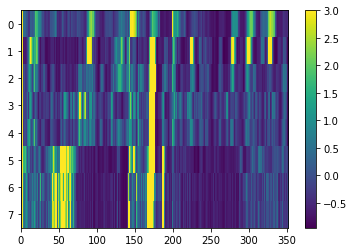

In [233]:
plt.imshow(data_features[:, -4, :,].T, aspect='auto')
plt.colorbar()

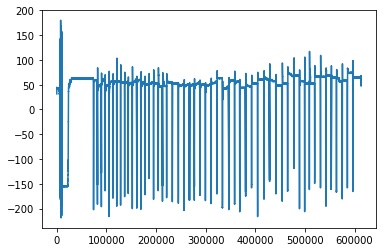

In [237]:
plt.plot(ieeg_raw[-1,:])

In [250]:
dict_out = {
    "data_features" : data_features, 
    "coord" : df_coord, 
    "fs" : fs, 
    "settings" : settings, 
    "df_M1" : df_M1, 
    "filters used" : filter_fun
}


In [253]:
dict_out["settings"]

{'BIDS_path': 'C:\\Users\\icn_admin\\OneDrive - Charité - Universitätsmedizin Berlin\\Data\\BIDS Berlin',
 'out_path': 'C:\\Users\\ICN_admin\\Documents\\icn\\icn_m1\\restructure\\BIDS_Berlin_M1',
 'resamplingrate': 10,
 'max_dist_cortex': 20,
 'max_dist_subcortex': 5,
 'normalization_time': 10,
 'frequencyranges': [[4, 8],
  [8, 12],
  [13, 20],
  [20, 35],
  [13, 35],
  [60, 80],
  [90, 200],
  [60, 200]],
 'featurelabels': ['theta',
  'alpha',
  'low beta',
  'high beta',
  'all beta',
  'low gamma',
  'HFA',
  'all gamma'],
 'seglengths': [1, 2, 2, 3, 3, 3, 10, 10, 10],
 'clip_low': -3,
 'clip_high': 3}